In [89]:
# Dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [102]:
target_terms = ("@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text = []
post_date = []
source = []

for target in target_terms:
    oldest_tweet = None
    
    #loop through 5 pages of tweets (100 total tweets)
    for page in range(5):

        #get all tweets from home feed
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
    
        for tweet in public_tweets:
            # run analysis on each tweet
            tweet_text = tweet["text"]
            results = analyzer.polarity_scores(tweet_text)
        
            #populate data
            text.append(tweet_text)
            compound_list.append(results["compound"])
            positive_list.append(results["pos"])
            negative_list.append(results["neg"])
            neutral_list.append(results["neu"])
            post_date.append(tweet["created_at"])
            source.append(target)
            
            oldest_tweet = tweet['id'] - 1

data_dict = {
    "Media Source" : source,
    "Tweet" : text,
    "Date" : post_date,
    "Compound" : compound_list,
    "Positive" : positive_list,
    "Negative" : negative_list,
    "Neutral" : neutral_list
}
    

# convert final result into DataFrame
data_df = pd.DataFrame(data_dict)
#print(data_df)
#Sat Sep 22 15:04:05 +0000 2018
data_df['Dates'] =pd.to_datetime(data_df.Date)
data_df_sorted = data_df.sort_values('Dates')

#export to csv
data_df_sorted.to_csv('news_analysis.csv')

data_df_sorted.head(50)

#print(data_df_sorted)

    Media Source                                              Tweet  \
0           @BBC  Chile has launched a huge hiking route through...   
1           @BBC  🐣😍 Conservationists have been monitoring the p...   
2           @BBC  'My children bought back the car I sold to pay...   
3           @BBC  RT @BBCEngland: Benny the beluga whale is spen...   
4           @BBC  Always start by playing paper! 👊✋✌️\n\nThis is...   
5           @BBC  'What do I know her from again?' 🤔📺\n\nThese a...   
6           @BBC  This is the world's most dangerous city to be ...   
7           @BBC  "New York City is underwhelming". 😳😳😳\n \n#Unp...   
8           @BBC  What's it like growing up with tourettes?\n\nB...   
9           @BBC  This school became a national leader by focusi...   
10          @BBC  RT @BBCOne: .@LadyGaga &amp; Jodie Whittaker p...   
11          @BBC  "I've broken around 80 bones". 😬🏥\n\nMeet the ...   
12          @BBC  Say hello to baby Omo, a rare albino squirrel....   
13    

,Media Source,Tweet,Date,Compound,Positive,Negative,Neutral,Dates
99,@BBC,Sea dragons are so elegant 😍 #Oceans\n\nhttps:...,Sun Sep 23 15:03:04 +0000 2018,0.8058,0.447,0.000,0.553,2018-09-23 15:03:04
98,@BBC,'We're in love but never have sex'. \n\nhttps:...,Sun Sep 23 16:04:03 +0000 2018,0.3818,0.245,0.000,0.755,2018-09-23 16:04:03
97,@BBC,"Falling leaves, dramatic skies, misty mornings...",Sun Sep 23 17:02:01 +0000 2018,0.5267,0.221,0.071,0.708,2018-09-23 17:02:01
96,@BBC,🤔📆 Quiz: Can you guess which celebrity is the ...,Sun Sep 23 18:02:04 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-23 18:02:04
95,@BBC,Get ready to learn the truth.\n\nDon’t miss th...,Sun Sep 23 19:04:06 +0000 2018,0.4939,0.214,0.071,0.714,2018-09-23 19:04:06
94,@BBC,"RT @BBCOne: Just David Budd, having the epitom...",Sun Sep 23 20:32:23 +0000 2018,-0.7398,0.000,0.288,0.712,2018-09-23 20:32:23
93,@BBC,RT @BBCOne: 157 crew.\n88 shoot days.\n56 cast...,Sun Sep 23 22:04:30 +0000 2018,0.1280,0.124,0.103,0.773,2018-09-23 22:04:30
92,@BBC,This is the most hardcore baptism you’ll ever ...,Mon Sep 24 07:02:04 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-24 07:02:04
91,@BBC,There are plans for scientists in Russia to at...,Mon Sep 24 07:31:07 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-24 07:31:07
90,@BBC,Mosquitoes are transferring plastics into the ...,Mon Sep 24 08:02:05 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-24 08:02:05


In [91]:
today_date = time.strftime("%m/%d/%Y")
print (today_date)

09/28/2018


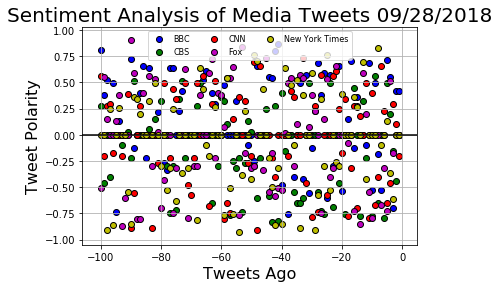

In [108]:
bbc_tweets = data_df_sorted.loc[(data_df_sorted["Media Source"] == "@BBC"), :]
cbs_tweets = data_df_sorted.loc[(data_df_sorted["Media Source"] == "@CBSNews"), :]
cnn_tweets = data_df_sorted.loc[(data_df_sorted["Media Source"] == "@CNN"), :]
fox_tweets = data_df_sorted.loc[(data_df_sorted["Media Source"] == "@FoxNews"), :]
nyt_tweets = data_df_sorted.loc[(data_df_sorted["Media Source"] == "@nytimes"), :]

bbc = plt.scatter(np.arange(-len(bbc_tweets), 0, 1), bbc_tweets['Compound'], marker='o', color='b', edgecolors='black')
cbs = plt.scatter(np.arange(-len(cbs_tweets), 0, 1), cbs_tweets['Compound'], marker='o', color='g', edgecolors='black')
cnn = plt.scatter(np.arange(-len(cnn_tweets), 0, 1), cnn_tweets['Compound'], marker='o', color='r', edgecolors='black')
fox = plt.scatter(np.arange(-len(fox_tweets), 0, 1), fox_tweets['Compound'], marker='o', color='m', edgecolors='black')
nyt = plt.scatter(np.arange(-len(nyt_tweets), 0, 1), nyt_tweets['Compound'], marker='o', color='y', edgecolors='black')
#plt.xticks([])
plt.grid(zorder=0)
plt.axhline(0, color="black")

plt.legend((bbc, cbs, cnn, fox, nyt),
           ('BBC', 'CBS', 'CNN', 'Fox', 'New York Times'),
           scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=8)

plt.ylabel('Tweet Polarity', fontsize=16)
plt.xlabel('Tweets Ago', fontsize=16)
plt.title(f"Sentiment Analysis of Media Tweets {today_date}",fontsize=20)
plt.savefig('sentiment-analysis.png')
plt.show()

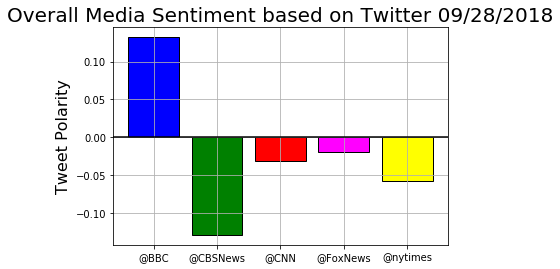

In [109]:
x_axis = np.arange(len(target_terms))
y_axis = [bbc_tweets['Compound'].mean(), cbs_tweets['Compound'].mean(), cnn_tweets['Compound'].mean(), fox_tweets['Compound'].mean(), nyt_tweets['Compound'].mean()]

rects = plt.bar(x_axis,y_axis,color=['blue', 'green', 'red', 'magenta', 'yellow'],edgecolor='black')
plt.xticks(x_axis, target_terms)
plt.axhline(0, color="black")
plt.grid(zorder=0)
plt.title(f"Overall Media Sentiment based on Twitter {today_date}", fontsize=20)
plt.ylabel('Tweet Polarity', fontsize=16)
plt.savefig('overall-media-sentiment.png')

#for rect, label in zip(rects, y_axis):
 #   height = rect.get_height()
 #   plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label, Sha='center', va='bottom')
plt.show()

,Media Source,Tweet,Date,Compound,Positive,Negative,Neutral,Dates
199,@CBSNews,JUST IN: Sen. Lisa Murkowski backs Sen. Jeff F...,Fri Sep 28 18:50:59 +0000 2018,0.2732,0.138,0.134,0.728,2018-09-28 18:50:59
198,@CBSNews,"WATCH: Powerful tsunami sweeps through Palu, I...",Fri Sep 28 18:59:18 +0000 2018,-0.4588,0.130,0.269,0.602,2018-09-28 18:59:18
197,@CBSNews,"""When someone explains it to Trump,"" Dem strat...",Fri Sep 28 19:12:17 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-28 19:12:17
196,@CBSNews,A military plane has crashed in coastal South ...,Fri Sep 28 19:19:49 +0000 2018,-0.4019,0.000,0.124,0.876,2018-09-28 19:19:49
195,@CBSNews,VIDEO: Seal slaps kayaker in the face with oct...,Fri Sep 28 19:59:58 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-28 19:59:58
194,@CBSNews,"""When someone explains it to Trump,"" Democrati...",Fri Sep 28 20:08:50 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-28 20:08:50
193,@CBSNews,BREAKING: Mark Judge say's he'll cooperate wit...,Fri Sep 28 20:37:52 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-28 20:37:52
192,@CBSNews,Lost baby koala cuddles with golden retriever ...,Fri Sep 28 21:00:52 +0000 2018,-0.1027,0.134,0.162,0.704,2018-09-28 21:00:52
191,@CBSNews,JUST IN: President Trump has ordered the FBI t...,Fri Sep 28 21:06:08 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-28 21:06:08
190,@CBSNews,Jesuit order's America magazine urges withdraw...,Fri Sep 28 21:24:33 +0000 2018,0.0258,0.099,0.000,0.901,2018-09-28 21:24:33


,Media Source,Tweet,Date,Compound,Positive,Negative,Neutral,Dates
99,@BBC,Sea dragons are so elegant 😍 #Oceans\n\nhttps:...,Sun Sep 23 15:03:04 +0000 2018,0.8058,0.447,0.000,0.553,2018-09-23 15:03:04
98,@BBC,'We're in love but never have sex'. \n\nhttps:...,Sun Sep 23 16:04:03 +0000 2018,0.3818,0.245,0.000,0.755,2018-09-23 16:04:03
97,@BBC,"Falling leaves, dramatic skies, misty mornings...",Sun Sep 23 17:02:01 +0000 2018,0.5267,0.221,0.071,0.708,2018-09-23 17:02:01
96,@BBC,🤔📆 Quiz: Can you guess which celebrity is the ...,Sun Sep 23 18:02:04 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-23 18:02:04
95,@BBC,Get ready to learn the truth.\n\nDon’t miss th...,Sun Sep 23 19:04:06 +0000 2018,0.4939,0.214,0.071,0.714,2018-09-23 19:04:06
94,@BBC,"RT @BBCOne: Just David Budd, having the epitom...",Sun Sep 23 20:32:23 +0000 2018,-0.7398,0.000,0.288,0.712,2018-09-23 20:32:23
93,@BBC,RT @BBCOne: 157 crew.\n88 shoot days.\n56 cast...,Sun Sep 23 22:04:30 +0000 2018,0.1280,0.124,0.103,0.773,2018-09-23 22:04:30
92,@BBC,This is the most hardcore baptism you’ll ever ...,Mon Sep 24 07:02:04 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-24 07:02:04
91,@BBC,There are plans for scientists in Russia to at...,Mon Sep 24 07:31:07 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-24 07:31:07
90,@BBC,Mosquitoes are transferring plastics into the ...,Mon Sep 24 08:02:05 +0000 2018,0.0000,0.000,0.000,1.000,2018-09-24 08:02:05
